**1. Import the BCW dataset**

In [ ]:
pip install ucimlrepo

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                   ^^^^^^^^
  File "/usr/local/lib/py

In [ ]:
#Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)

FileNotFoundError: [Errno 2] No such file or directory: 'GSE2034_series_matrix.txt'

2. Preprocessing

In [ ]:
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets
print(y.head())
print(y.columns)

   Class
0      2
1      2
2      2
3      2
4      2
Index(['Class'], dtype='object')


In [ ]:
# 1. Load features and target
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# 2. Drop or impute missing values (your choice)
X = X.dropna()           # OR use imputer
y = y.loc[X.index]       # Keep target aligned with filtered features

# 3. Convert target to binary
y = y['Class'].map({2: 0, 4: 1})

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



--- PCA + SVM (Linear) ---
Accuracy:    0.9635
Precision:   0.9216
Recall:      0.9792
Specificity: 0.9551
F1 Score:    0.9495
AUC-ROC:     0.9934


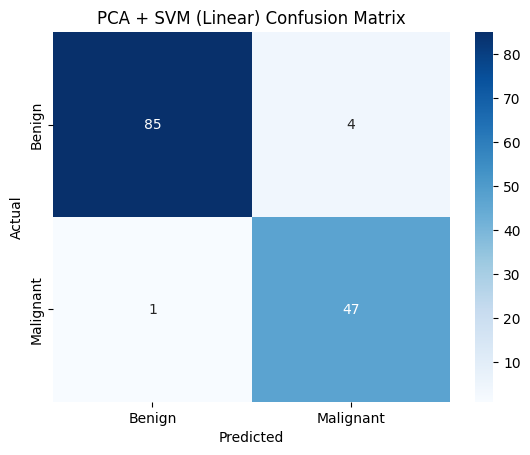


--- PCA + Logistic Regression ---
Accuracy:    0.9635
Precision:   0.9216
Recall:      0.9792
Specificity: 0.9551
F1 Score:    0.9495
AUC-ROC:     0.9937


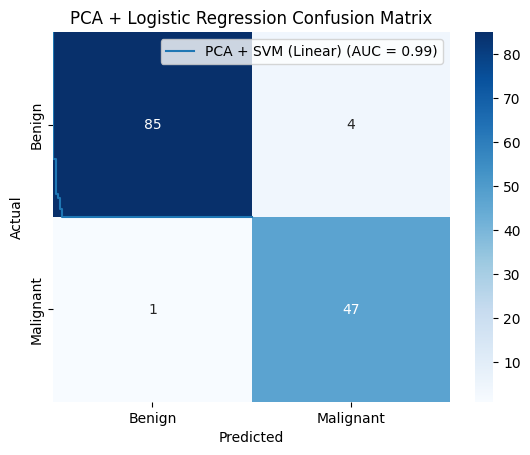


--- PCA + Random Forest ---
Accuracy:    0.9781
Precision:   0.9412
Recall:      1.0000
Specificity: 0.9663
F1 Score:    0.9697
AUC-ROC:     0.9898


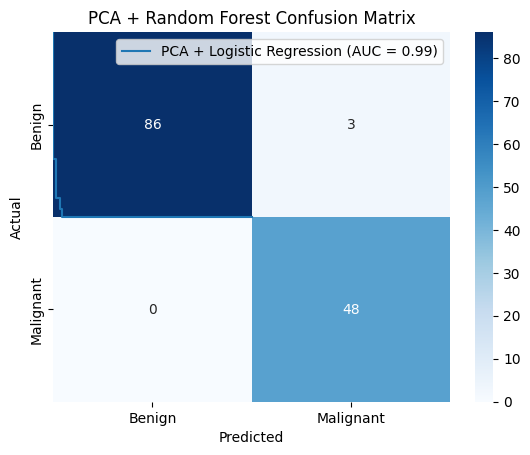

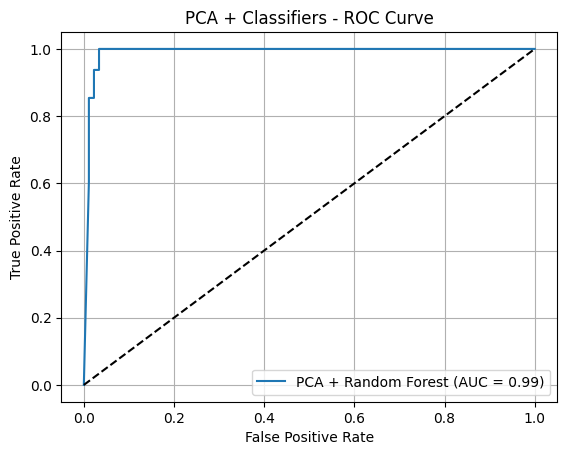


--- t-SNE + SVM (Linear) ---
Accuracy:    0.9489
Precision:   0.8727
Recall:      1.0000
Specificity: 0.9213
F1 Score:    0.9320
AUC-ROC:     0.9930


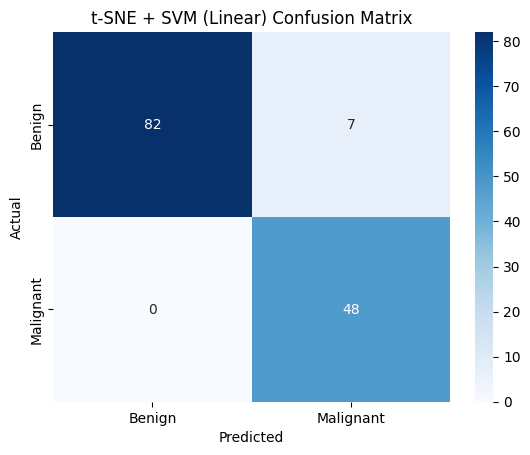


--- t-SNE + Logistic Regression ---
Accuracy:    0.9270
Precision:   0.8276
Recall:      1.0000
Specificity: 0.8876
F1 Score:    0.9057
AUC-ROC:     0.9913


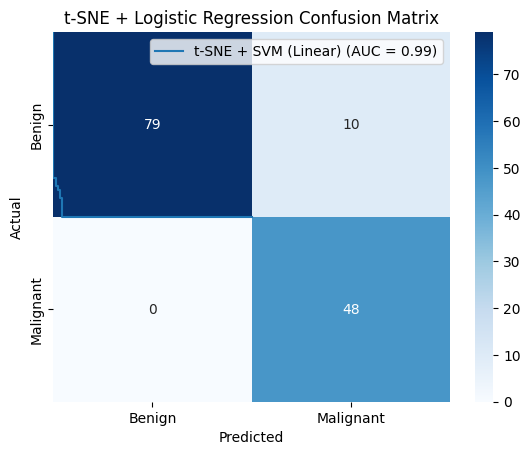


--- t-SNE + Random Forest ---
Accuracy:    0.9489
Precision:   0.8727
Recall:      1.0000
Specificity: 0.9213
F1 Score:    0.9320
AUC-ROC:     0.9649


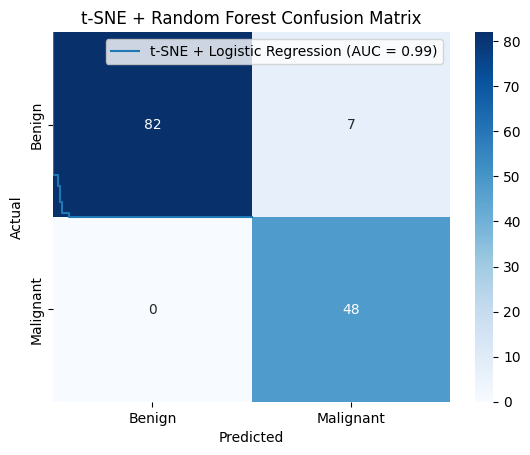

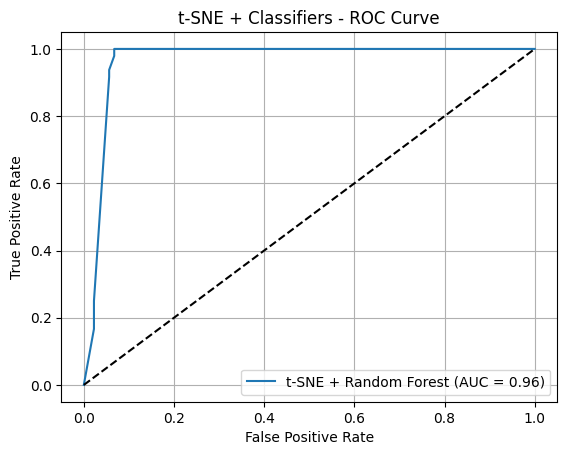

In [ ]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, roc_curve,
    accuracy_score, precision_score, recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from UCI
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets
X = X.dropna()           # OR use imputer
y = y.loc[X.index]       # Keep target aligned with filtered features

from sklearn.impute import SimpleImputer

# Impute missing values with column mean
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Binary encode target
y = y['Class'].map({2: 0, 4: 1})


# Define labels for confusion matrix
labels = ["Benign", "Malignant"]

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluation function
def evaluate_model(name, clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) else 0

    print(f"\n--- {name} ---")
    print(f"Accuracy:    {acc:.4f}")
    print(f"Precision:   {prec:.4f}")
    print(f"Recall:      {rec:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score:    {f1:.4f}")
    print(f"AUC-ROC:     {auc:.4f}")

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

# PCA-transformed data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# t-SNE-transformed data
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)  # For comparison only (not ideal)

# Classifiers
classifiers = {
    "SVM (Linear)": SVC(kernel="linear", probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ===== PCA + Classifiers =====
for name, clf in classifiers.items():
    evaluate_model(f"PCA + {name}", clf, X_train_pca, X_test_pca, y_train, y_test)

plt.title("PCA + Classifiers - ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.grid()
plt.show()

# ===== t-SNE + Classifiers =====
for name, clf in classifiers.items():
    evaluate_model(f"t-SNE + {name}", clf, X_train_tsne, X_test_tsne, y_train, y_test)

plt.title("t-SNE + Classifiers - ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.grid()
plt.show()